In [1]:
library(circlize)
library(tidyverse)

circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [25]:
setwd('~/stereoseq/20240502-SPACseq')
flows <- read_csv('./celltype_proximity.csv')

Rows: 81 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): source, target
dbl (1): weight
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): source, target
dbl (1): weight

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [55]:
# 使用 flows 数据绘制和弦图
# 改变 flows 中 source 的比例，使得其 node 与 target 的占比是一半一半
flows$source <- factor(flows$source, levels = c(setdiff(unique(flows$source), "sgNon-targeting"), "sgNon-targeting"))
source_proportion <- table(flows$source) / sum(table(flows$source))
target_proportion <- table(flows$target) / sum(table(flows$target))

# 确保 source_proportion 和 target_proportion 的名称一致
all_levels <- union(names(source_proportion), names(target_proportion))
source_proportion <- source_proportion[all_levels]
target_proportion <- target_proportion[all_levels]
source_proportion[is.na(source_proportion)] <- 0
target_proportion[is.na(target_proportion)] <- 0

combined_proportion <- (source_proportion + target_proportion) / 2

# 确保 grid_colors 的长度与 flows$source 的唯一值数量一致
grid_colors <- RColorBrewer::brewer.pal(n = min(length(unique(flows$source)), 11), name = "YlGnBu")

# 使用 colorRamp2 函数来定义边的颜色
# 确保 breaks 的长度与 colors 的长度一致
breaks <- seq(min(flows$weight), max(flows$weight), length.out = 11)
edge_colors <- colorRamp2(breaks, rev(RColorBrewer::brewer.pal(11, "RdBu")))

# 绘制和弦图，使用箭头表示边
pdf(file = "./chord_diagram.pdf", width = 8, height = 8)
chordDiagram(flows, transparency = 0.7, annotationTrack = "grid", preAllocateTracks = list(track.height = 0.1), 
             grid.col = setNames(grid_colors, levels(flows$source)[1:length(grid_colors)]), 
             col = edge_colors(flows$weight), directional = 1, direction.type = "arrows+diffHeight", link.arr.type = "big.arrow")
circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
  sector.name <- get.cell.meta.data("sector.index")
  circos.text(CELL_META$xcenter, CELL_META$ylim[1] + mm_y(5), sector.name, facing = "clockwise", niceFacing = TRUE, adj = c(0, 0.5))
}, bg.border = NA)
dev.off()

pdf 
  2

In [3]:
setwd('~/stereoseq/20240702-Exclusive')
flows <- read_csv('./flows.csv')

Rows: 119 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): perturb_gene, cluster, source, target
dbl (4): count, total_gene_flow, color_intensity, weight

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


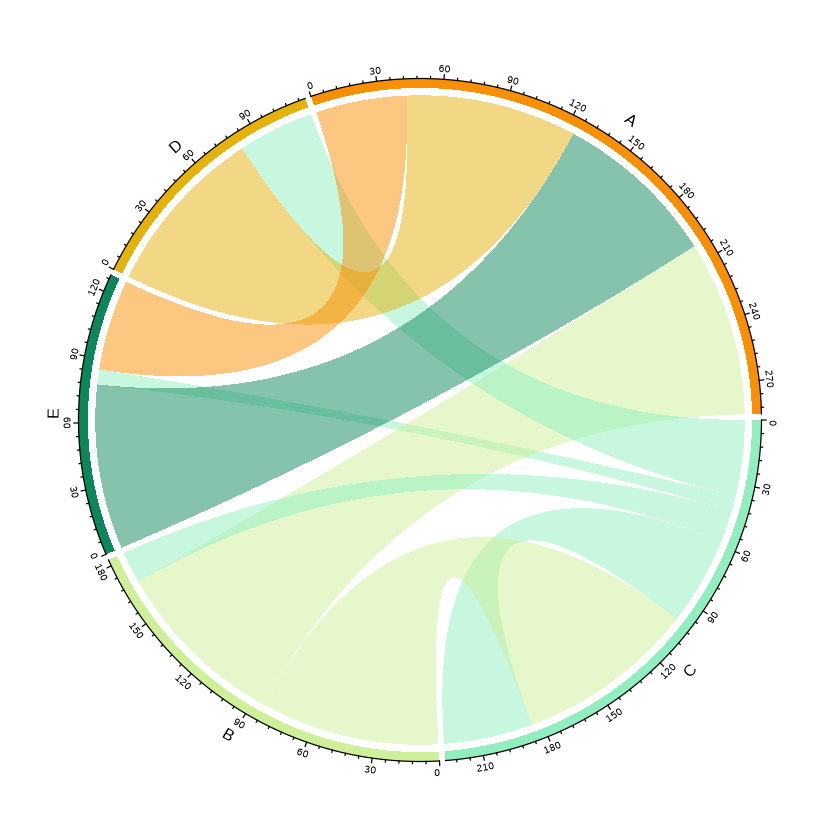

In [2]:
# 示例数据
set.seed(123)
data <- data.frame(from = sample(LETTERS[1:5], 10, replace = TRUE),
                   to = sample(LETTERS[1:5], 10, replace = TRUE),
                   value = sample(1:100, 10))

# 创建和绘制和弦图
chordDiagram(data, transparency = 0.5)


There are more than one numeric columns in the data frame. Take the
first two numeric columns and draw the link ends with unequal width.

Type `circos.par$message = FALSE` to suppress the message.



There are more than one numeric columns in the data frame. Take the
first two numeric columns and draw the link ends with unequal width.

Type `circos.par$message = FALSE` to suppress the message.



pdf 
  2

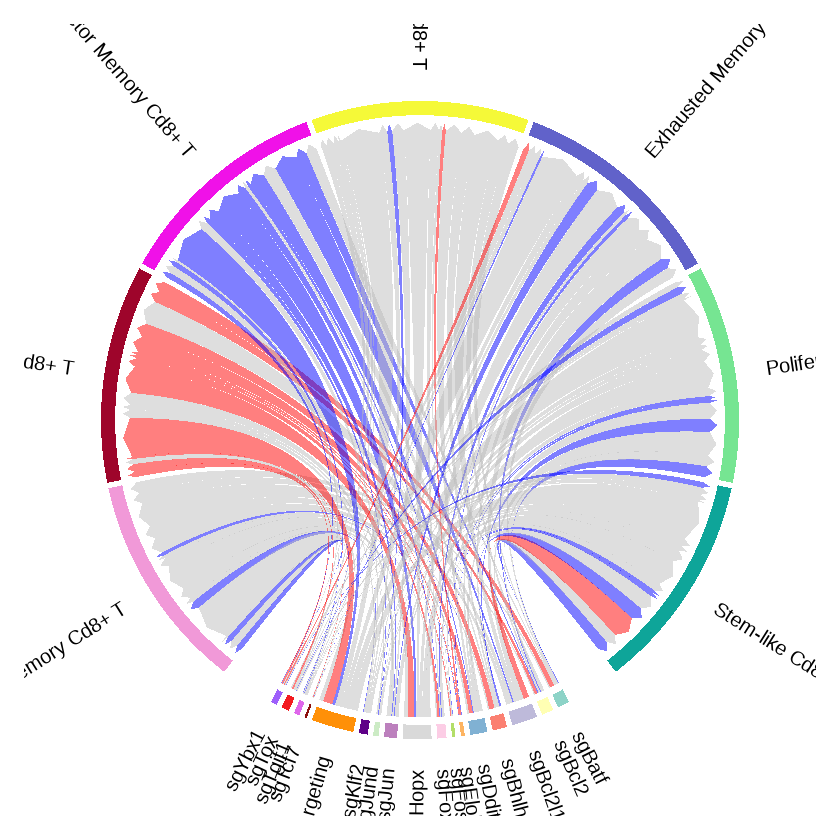

In [8]:
# 使用 flows 数据绘制和弦图
# 改变 flows 中 source 的比例，使得其 node 与 target 的占比是一半一半
flows$source <- factor(flows$source, levels = c(setdiff(unique(flows$source), "sgNon-targeting"), "sgNon-targeting"))
source_proportion <- table(flows$source) / sum(table(flows$source))
target_proportion <- table(flows$target) / sum(table(flows$target))

# 确保 source_proportion 和 target_proportion 的名称一致
all_levels <- union(names(source_proportion), names(target_proportion))
source_proportion <- source_proportion[all_levels]
target_proportion <- target_proportion[all_levels]
source_proportion[is.na(source_proportion)] <- 0
target_proportion[is.na(target_proportion)] <- 0

combined_proportion <- (source_proportion + target_proportion) / 2

# 确保 grid_colors 的长度与 flows$source 的唯一值数量一致
grid_colors <- RColorBrewer::brewer.pal(n = min(length(unique(flows$source)), 11), name = "Set3")

# 根据 weight 调整箭头的颜色，weight < 1 为蓝色，> 1 为红色，-1 < weight < 1 为灰色
edge_colors <- ifelse(flows$weight < 0.1, "blue", 
                      ifelse(flows$weight > 0.22, "red", "grey"))

# 绘制和弦图，使用箭头表示边
chordDiagram(flows, transparency = 0.5, annotationTrack = "grid", preAllocateTracks = list(track.height = 0.1), 
             grid.col = setNames(grid_colors, levels(flows$source)[1:length(grid_colors)]), 
             col = edge_colors, directional = 1, direction.type = "arrows", link.arr.type = "big.arrow")
circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
  sector.name <- get.cell.meta.data("sector.index")
  circos.text(CELL_META$xcenter, CELL_META$ylim[1] + mm_y(5), sector.name, facing = "clockwise", niceFacing = TRUE, adj = c(0, 0.5))
}, bg.border = NA)

# 保存图片
pdf(file = "./chord_diagram.pdf", width = 8, height = 8)
chordDiagram(flows, transparency = 0.5, annotationTrack = "grid", preAllocateTracks = list(track.height = 0.1), 
             grid.col = setNames(grid_colors, levels(flows$source)[1:length(grid_colors)]), 
             col = edge_colors, directional = 1, direction.type = "arrows", link.arr.type = "big.arrow")
circos.trackPlotRegion(track.index = 1, panel.fun = function(x, y) {
  sector.name <- get.cell.meta.data("sector.index")
  circos.text(CELL_META$xcenter, CELL_META$ylim[1] + mm_y(5), sector.name, facing = "clockwise", niceFacing = TRUE, adj = c(0, 0.5))
}, bg.border = NA)
dev.off()
